In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

# 1. Cargar el dataset
df = pd.read_csv('bitcoin.csv')

Precisión del modelo en el conjunto de prueba: 1.0000
Modelo serializado y guardado exitosamente como 'bitcoin_model.joblib'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual de los gráficos para que se vean más modernos
sns.set_theme(style="whitegrid")

# Cargar los datos
df = pd.read_csv('bitcoin.csv')

# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Mostrar las primeras 5 filas para comprobar que cargó bien
df.head()

,Date,Open,High,Low,Close,Volume,PriceCategory
0,2010-01-01,0.3,0.303428,0.295510,0.3,715.8,Low
1,2010-01-02,0.3,0.304377,0.299459,0.3,2028.3,Low
2,2010-01-03,0.3,0.303736,0.295858,0.3,273.0,Low
3,2010-01-04,0.3,0.303406,0.298489,0.3,1452.0,Low
4,2010-01-05,0.3,0.302715,0.296330,0.3,1002.6,Low


In [9]:
# Ver estadísticas descriptivas de los datos
df.describe()

,Date,Open,High,Low,Close,Volume
count,5883,5883.000000,5883.000000,5883.000000,5883.000000,5.883000e+03
mean,2018-01-20 00:00:00,21725.051095,21973.716194,21487.576193,21736.779754,1.087915e+08
min,2010-01-01 00:00:00,0.300000,0.300327,0.294003,0.300000,3.030000e+01
25%,2014-01-10 12:00:00,430.570000,431.211444,422.134483,430.570000,1.271205e+06
50%,2018-01-20 00:00:00,7193.600000,7207.978990,7057.971811,7193.600000,1.756809e+07
75%,2022-01-29 12:00:00,42265.190000,42370.135719,41483.578807,42265.190000,1.302297e+08
max,2026-02-08 00:00:00,93429.200000,95281.011865,93326.445480,93429.200000,9.325168e+08
std,NaN,30114.978682,30445.256528,29793.029792,30119.952256,1.851098e+08


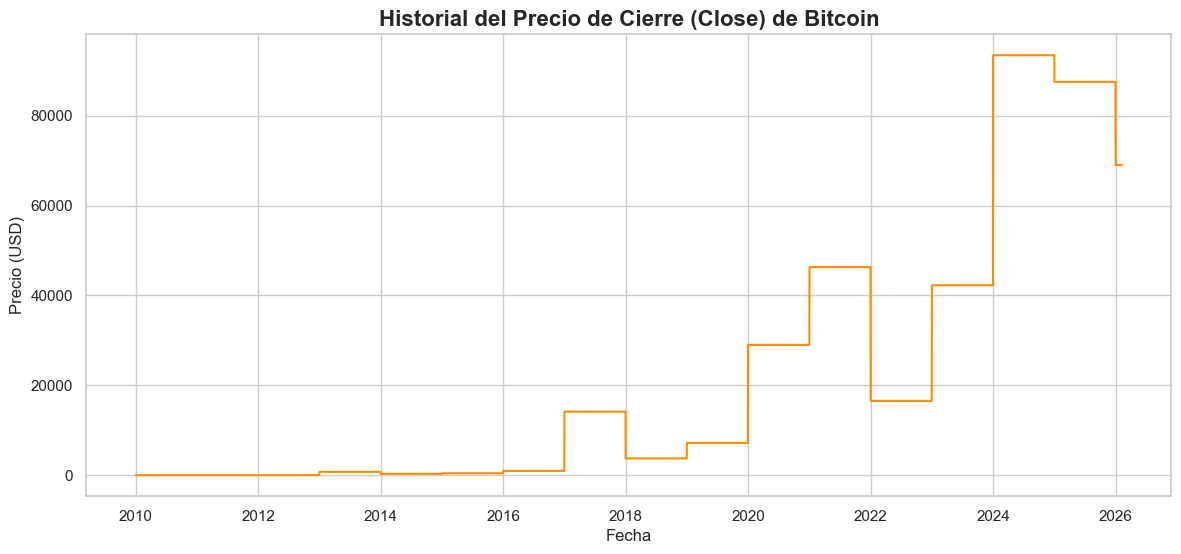

In [10]:
plt.figure(figsize=(14, 6))

# Dibujar la línea de precio de cierre
plt.plot(df['Date'], df['Close'], color='darkorange', linewidth=1.5)

# Títulos y etiquetas
plt.title('Historial del Precio de Cierre (Close) de Bitcoin', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)

# Mostrar el gráfico en el notebook
plt.show()

/var/folders/0t/ssrzytjj7138g78t7p6vfp6r0000gn/T/ipykernel_62886/1930945514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


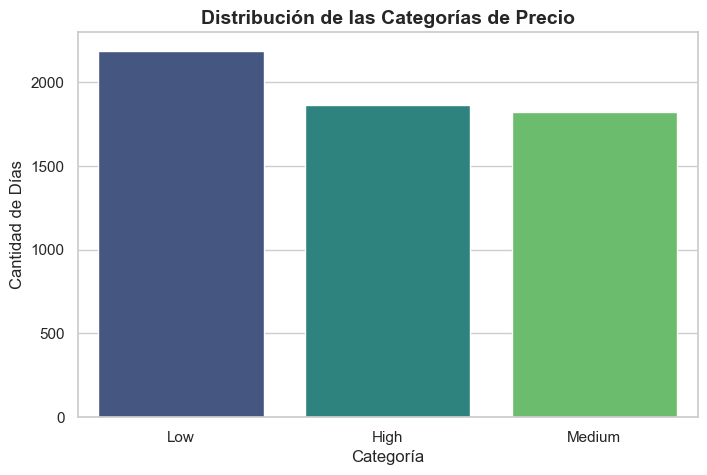

In [11]:
plt.figure(figsize=(8, 5))

# Crear el gráfico de conteo (barras)
sns.countplot(
    data=df, 
    x='PriceCategory', 
    order=df['PriceCategory'].value_counts().index, 
    palette='viridis'
)

# Títulos y etiquetas
plt.title('Distribución de las Categorías de Precio', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Días', fontsize=12)

# Mostrar el gráfico
plt.show()

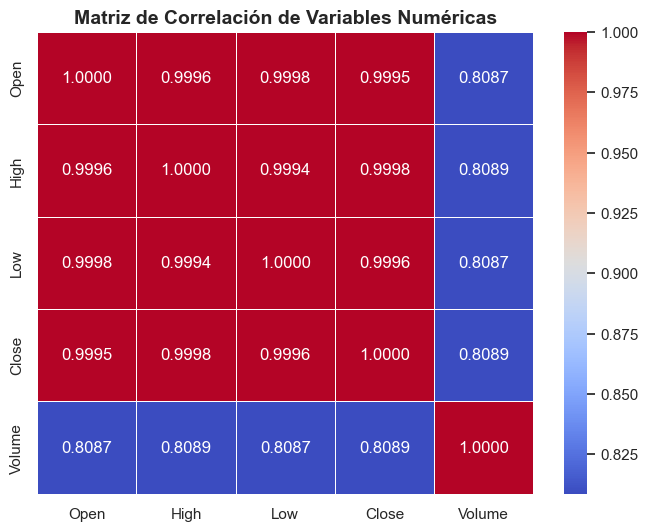

In [12]:
plt.figure(figsize=(8, 6))

# Seleccionar solo las columnas numéricas
columnas_numericas = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Calcular la matriz de correlación
correlacion = columnas_numericas.corr()

# Dibujar el mapa de calor
sns.heatmap(
    correlacion, 
    annot=True,          # Muestra los números dentro de los cuadros
    cmap='coolwarm',     # Paleta de colores (rojo para correlación alta, azul para baja)
    fmt='.4f',           # Formato de 4 decimales
    linewidths=0.5
)

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

In [ ]:
# 2. Preprocesamiento básico
# Convertir 'Date' a formato de fecha y asignarlo como índice
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Eliminar valores nulos (si existieran)
df = df.dropna()

# Separar variables predictoras (X) y la variable objetivo (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['PriceCategory']

In [ ]:
# 3. Dividir los datos en Entrenamiento (80%) y Prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 4. Crear un Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escala las características para que tengan media 0 y varianza 1
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) # El modelo
])

In [ ]:
# 5. Entrenar el modelo
pipeline.fit(X_train, y_train)

In [ ]:
# Evaluar el modelo (Opcional, para verificar su rendimiento)
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.4f}")

In [ ]:
# 6. Serializar (guardar) el modelo entrenado
model_filename = 'bitcoin_model.joblib'
joblib.dump(pipeline, model_filename)
print(f"Modelo serializado y guardado exitosamente como '{model_filename}'")